In [1]:
from __future__ import division
from __future__ import print_function

import os

from myhdl import *
from support import vcd
from support import run_testbench

%matplotlib inline

First, clone the repository and run the ipython notebook in the cloned workspace:

    >> git clone https://github/cfelton/myhdl_exercises
    >> cd myhdl_exercises
    >> ipython notebook
    
Next, to run the exercises the *myhdl* package needs to be available.  If the above cell did not execute without error (the import statement) the packages need to be retrieved and the notebook kernel restarted, the myhdl package can be retrieved via *pypi*:

    >> pip install myhdl    
    
Or the latest can be retrieved from:

    >> git clone https://github.com/jandecaluwe/myhdl
    
Once the packages are installed the following cells should complete without error.  Experiment with the following and see how some of the types in MyHDL behave.  

In [2]:
x = intbv(0, min=-8, max=8)
x[:] = 3
y = intbv(0, min=2*x.min, max=2*x.max)
y[:] = x * 2
assert x == 3
assert y == 6

(<matplotlib.figure.Figure at 0x105982cc0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x105a50e10>)

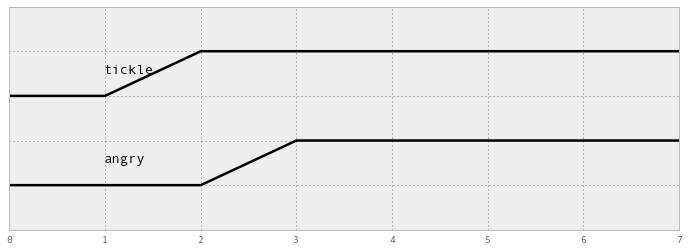

In [4]:

def family_dynamics():
    tickle = Signal(False)
    angry = Signal(False)

    @instance
    def grumpy_old_man():
        while True:
            angry.next = True if tickle else False
            yield delay(1)
            
    @instance
    def toddler():
        yield delay(2)
        while True:
            if not angry:
                tickle.next = True
            else:
                tickle.next = True  # :)
            yield delay(1)
        
    @instance
    def fun_police():
        yield delay(4)
        assert angry
        yield delay(4)
        raise StopSimulation
        
    return grumpy_old_man, toddler, fun_police

run_testbench(family_dynamics, 'family_dynamics')
vcd.parse_and_plot('vcd/family_dynamics.vcd')

At this point there is no expectation that the above is comprehensible.  The above tests that the pakcages are installed correctly The [MyHDL manual](http://docs.myhdl.org/en/stable/) is the best spot to get started (always feel free to provide feedback and make contributions to the manual either through the [github issues](https://github.com/jandecaluwe/myhdl/issues) or a pull request to the [myhdl repo](https://github.com/jandecaluwe/myhdl).  These exercises assume basic familiarity with MyHDL.  The following sections of the manual should be reviewed be starting the exercises:

0. [Background Information](http://docs.myhdl.org/en/stable/manual/background.html)
0. [Signals, ports, and concurrency](http://docs.myhdl.org/en/stable/manual/intro.html#signals-ports-and-concurrency), the [signal assignment essay](http://www.jandecaluwe.com/hdldesign/signal-assignments.html) is also a valuable read.
0. [RTL modeling](http://docs.myhdl.org/en/stable/manual/rtl.html#rtl-modeling)

Each of the exercises will describe a module that needs to be implemented, it will defined the inputs and outputs.  In the `test_XX_mex.py` files are the tests for each module.  The exercises will provide a verification test and later modules the student will develop the tests.

After reviewing some of the documentation proceed to the first exercise **01_mex_shifty.ipynb**.
